In [121]:
from astropy.io import fits
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from scipy.ndimage import convolve
plt.style.use(astropy_mpl_style)

In [122]:
HSC_PIX = 0.17
NOISE_DIST = 1.0


In [123]:
filenames = [
'/home/jimenez/work/Formation/Astroinfo/Diffusion/hack_images/cutout-HSC-I-9812-pdr1_udeep-230704-142442.fits',
'/home/jimenez/work/Formation/Astroinfo/Diffusion/hack_images/cutout-HSC-I-9813-pdr1_udeep-230704-134853.fits',
'/home/jimenez/work/Formation/Astroinfo/Diffusion/hack_images/cutout-HSC-I-9813-pdr1_udeep-230704-134950.fits',
'/home/jimenez/work/Formation/Astroinfo/Diffusion/hack_images/cutout-HSC-I-9813-pdr1_udeep-230704-135223.fits',
'/home/jimenez/work/Formation/Astroinfo/Diffusion/hack_images/cutout-HSC-I-9813-pdr1_udeep-230704-141025.fits'
]
psf_filename = '/home/jimenez/work/Formation/Astroinfo/Diffusion/hack_images/psf-calexp-pdr1_udeep-HSC-I-9812-1,6-149.37258-2.63547.fits'

In [124]:
def magnitude_to_flux_in_janskies(magnitude_values):
    """
    See https://en.wikipedia.org/wiki/AB_magnitude
    """
    return 10 ** ((magnitude_values - 8.9) / (-2.5)) / HSC_PIX

def raw_to_ab_magnitude(img_to_conv):
    """
    See comment in "FLUXMAG0" keyword in header fits image HSC
    """
    return 2.5*np.log(flux_mag/img_to_conv)

def create_images(filename):
    with fits.open(filename) as l_hdu:
        img_to_conv = l_hdu[1].data
        l_head = l_hdu[0].header
        d_head = l_hdu[1].header

    flux_mag = np.float32(l_head["FLUXMAG0"])

    shape = (d_head["NAXIS1"], d_head["NAXIS2"])
    ab_mag_image = raw_to_ab_magnitude(img_to_conv)
    jansky_image = magnitude_to_flux_in_janskies(ab_mag_image)
    return [shape, img_to_conv, ab_mag_image, jansky_image]


/tmp/ipykernel_1104054/3071897311.py:11: RuntimeWarning: invalid value encountered in log
  return 2.5*np.log(flux_mag/img_to_conv)


Plotting file /home/jimenez/work/Formation/Astroinfo/Diffusion/hack_images/cutout-HSC-I-9812-pdr1_udeep-230704-142442.fits
With shape: (715, 715)
Plotting file /home/jimenez/work/Formation/Astroinfo/Diffusion/hack_images/cutout-HSC-I-9813-pdr1_udeep-230704-134853.fits
With shape: (208, 259)
Plotting file /home/jimenez/work/Formation/Astroinfo/Diffusion/hack_images/cutout-HSC-I-9813-pdr1_udeep-230704-134950.fits
With shape: (851, 1050)
Plotting file /home/jimenez/work/Formation/Astroinfo/Diffusion/hack_images/cutout-HSC-I-9813-pdr1_udeep-230704-135223.fits
With shape: (715, 715)
Plotting file /home/jimenez/work/Formation/Astroinfo/Diffusion/hack_images/cutout-HSC-I-9813-pdr1_udeep-230704-141025.fits
With shape: (715, 715)


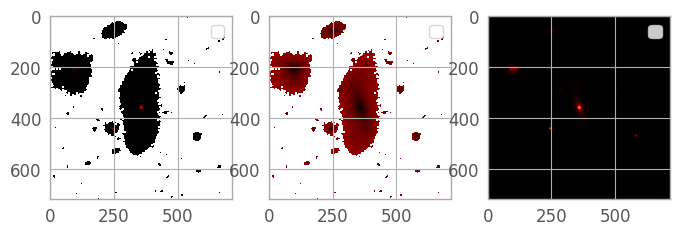

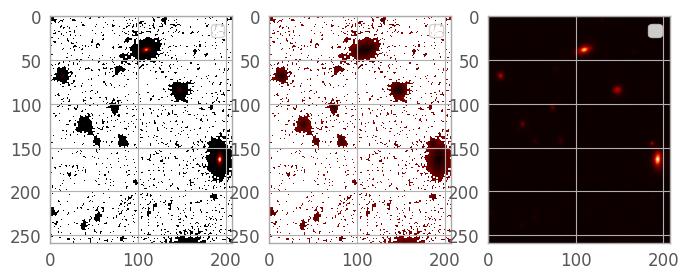

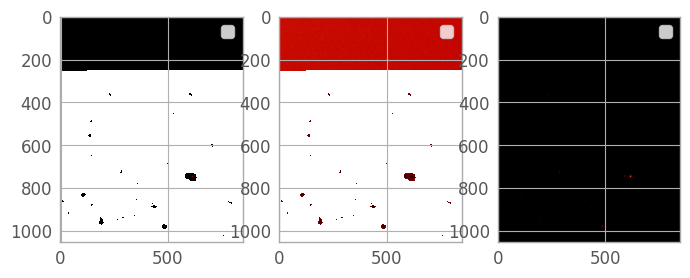

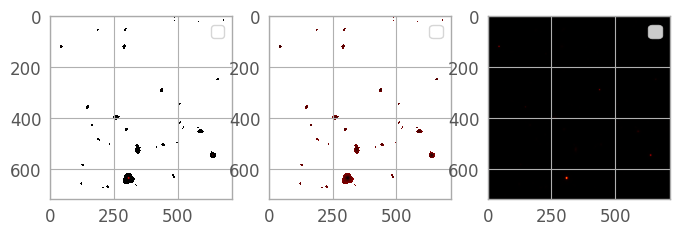

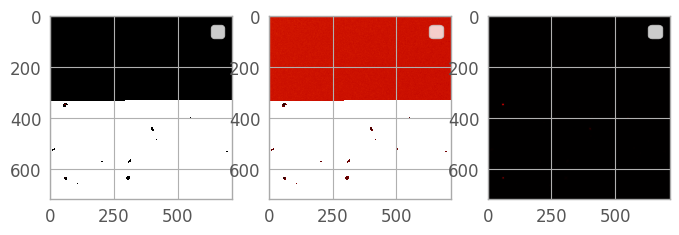

In [134]:
for filename in filenames:
    shape, raw, abmag, jansky = create_images(filename)
    abmag = np.random.normal(1,1,abmag.shape) + abmag
    print(f"Plotting file {filename}")
    print(f"With shape: {shape}")
    plt.figure()
    plt.subplot(131)
    plt.imshow(jansky)
    plt.legend("Jansky")
    plt.subplot(132)
    plt.legend("AB magnitude")
    plt.imshow(abmag)
    plt.subplot(133)
    plt.legend("Raw data")
    plt.imshow(raw)
    


In [126]:
with fits.open(psf_filename) as h_psf:
    psf = h_psf[0].data

In [136]:
shape, raw, abmag, jansky = create_images(filenames[0])   
conv_image = convolve(raw, psf)
conv_image += np.random.normal(1,1,conv_image.shape)

/tmp/ipykernel_1104054/3071897311.py:11: RuntimeWarning: invalid value encountered in log
  return 2.5*np.log(flux_mag/img_to_conv)


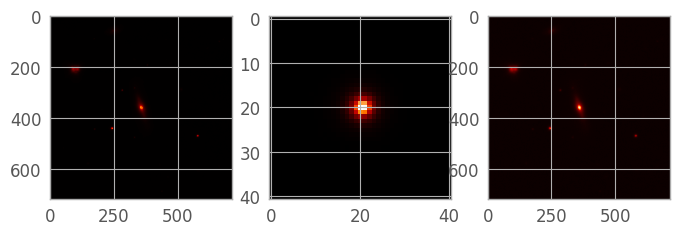

In [137]:
plt.figure()
plt.subplot(131)
plt.imshow(raw)
plt.subplot(132)
plt.imshow(psf)
plt.subplot(133)
plt.imshow(conv_image)


In [130]:
conv_image.shape

(715, 715)

In [131]:
shape

(715, 715)